In [16]:
import exobengal as ex 

In [17]:
detect = ex.DetectExoplanet()
detect.train_cnn()


Epoch 1/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7003 - loss: 0.5764 - val_accuracy: 0.7747 - val_loss: 0.5026
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7734 - loss: 0.4971 - val_accuracy: 0.8066 - val_loss: 0.4589
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.4786 - val_accuracy: 0.8139 - val_loss: 0.4420
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4603 - val_accuracy: 0.8129 - val_loss: 0.4408
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4525 - val_accuracy: 0.8129 - val_loss: 0.4265
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4492 - val_accuracy: 0.8202 - val_loss: 0.4155
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.4377 - val_accuracy: 0.8197 - val_loss: 0.4164
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4398 - val_accuracy: 0.

CNN model saved to /home/kmshariat/Astronomy/ExoBengal/models/cnn_model.h5


In [13]:
# ["koi_period", "koi_prad", "koi_teq", "koi_srad", "koi_slogg", "koi_steff", "koi_impact", "koi_duration", "koi_depth"]
data = [0.8930477, 0.47, 973, 0.496, 4.76, 1834, 0.562, 2.137, 0.1431]
detect.cnn(data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: Not a Planet, Probability: 0.44


{'prediction': 'Not a Planet', 'probability': 0.44393017888069153}

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       939
           1       0.83      0.83      0.83       974

    accuracy                           0.82      1913
   macro avg       0.82      0.82      0.82      1913
weighted avg       0.82      0.82      0.82      1913



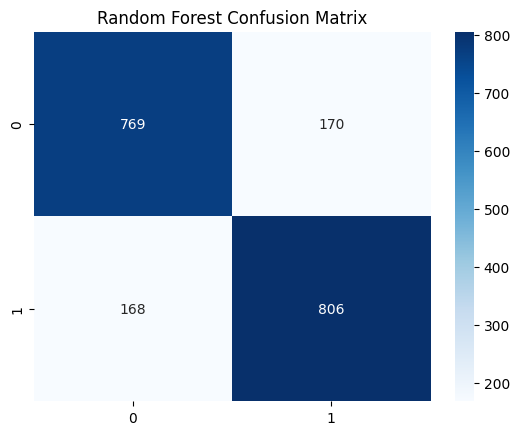

AUC-ROC: 0.90
Random Forest model saved to /home/kmshariat/Astronomy/ExoBengal/models/random_forest_classifier.pkl


In [14]:
detect.train_random_forest()

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       968
           1       0.76      0.81      0.79       945

    accuracy                           0.78      1913
   macro avg       0.79      0.78      0.78      1913
weighted avg       0.79      0.78      0.78      1913



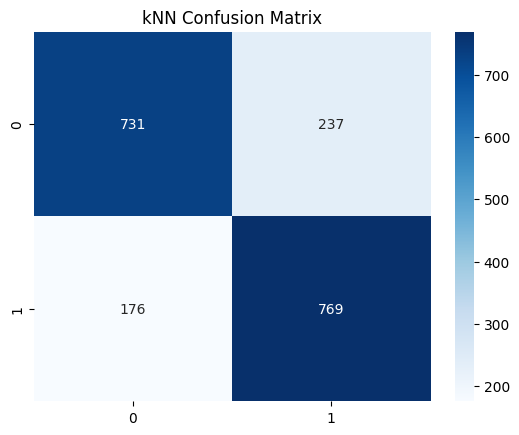

AUC-ROC: 0.86
kNN model saved to /home/kmshariat/Astronomy/ExoBengal/models/knn_model.pkl


In [15]:
detect.train_knn()